# **Assignment 2**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Describe the dataset**
The dataset we working on is the <a href="https://beta.ukdataservice.ac.uk/datacatalogue/studies/study?id=8963">Smart Energy Research Lab: Statistical Data, 2019-2021: Safeguarded Access</a> which is regulated and provided by <a href="https://serl.ac.uk/key-documents/reports/">The Smart Energy Research Lab</a>.  

We've got two versions of the dataset from the data owner:  
- **"SERL Stats Report (volume 1) - Tabular data v03b Final.xlsx"**
- **"serl_energy_use_in_GB_domestic_buildings_2021_aggregated_statistics_v01.csv"**

In [2]:
#read the csv file.
data = pd.read_csv("serl_energy_use_in_GB_domestic_buildings_2021_aggregated_statistics_v01.csv")

/var/folders/lw/cbxh4d5n6nj91c7dnbv6yy740000gn/T/ipykernel_60997/1622481295.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("serl_energy_use_in_GB_domestic_buildings_2021_aggregated_statistics_v01.csv")


##### **1. What is the general type of the data.**
The two files of datasets we got from the  data owner.

The **first** file named **"SERL Stats Report (volume 1) - Tabular data v03b Final.xlsx"** is an Excel file, with one tab per set of data. Each tab corresponds to one of the graphs in the report <a href="https://discovery.ucl.ac.uk/id/eprint/10148066/1/SERL%20Stats%20Report%201.pdf">Smart Energy Research Lab:
Energy use in GB domestic buildings 2021</a> that SERL have published. 
This dataset is an analyzed and processed dataset, the data owner give this to us to help us understand the datasets better. And it also have a data dictionary which explains what every column contains.

The **second** file named **"serl_energy_use_in_GB_domestic_buildings_2021_aggregated_statistics_v01.csv"** is a larger dataset, which contains near 110,000 rows of statistical data. All the data shown in the first statistical table is subset of this dataset. The original data was collected from approximately 13,000 homes that are broadly representative of the GB population in terms of region and Index of Multiple Deprivation (IMD) quintile. 

The statistical dataset described here consists of aggregated summaries of the net electricity and gas consumption data with aggregated linked contextual data, optionally grouped by one of the categorical variables (e.g. by region, by EPC rating) or by banded continuous variables (e.g. temperature band) available in the contextual data.

In [3]:
#show the some samples of the dataset.
data.head()

,fuel,unit,summary_stat,subsample,summary_time,time_period,segmentation_variable_1,segment_1_value,value,n_sample,...,mean_temp,mean_hdd,decimal_places,weekday_weekend,mean_floor_area,n_mean_floor_area,mean_bedrooms,n_mean_bedrooms,mean_occupants,n_mean_occupants
0,Net Electricity,kWh,mean,all,2021,2021,None,None,9.823,10764.0,...,10.378,5.74,3.0,both,95.551547,7617.0,2.918951,12659.0,2.277386,12625.0
1,Net Electricity,kWh,standard deviation,all,2021,2021,None,None,7.700,10764.0,...,10.378,5.74,3.0,both,95.551547,7617.0,2.918951,12659.0,2.277386,12625.0
2,Net Electricity,kWh,median,all,2021,2021,None,None,8.168,10764.0,...,10.378,5.74,3.0,both,95.551547,7617.0,2.918951,12659.0,2.277386,12625.0
3,Net Electricity,kWh,75th percentile,all,2021,2021,None,None,12.212,10764.0,...,10.378,5.74,3.0,both,95.551547,7617.0,2.918951,12659.0,2.277386,12625.0
4,Net Electricity,kWh,25th percentile,all,2021,2021,None,None,5.415,10764.0,...,10.378,5.74,3.0,both,95.551547,7617.0,2.918951,12659.0,2.277386,12625.0


In this dataset, all the statistical data have been aggregated into groups by the same segmentations. For each grouping, the following household-level summaries are calculated for the households that are members of that grouping:  
 
- Mean of:
    - Electricity and gas consumption
    - External temperature
    - Heatingdegreedays(fordailysummariesonly)
- Standard deviation of:
    - Electricity and gas consumption
- Percentiles (25th, 50th, 75th) of:
    - Electricity and gas consumption
- N – the number of household-level summaries used to compute the statistic

##### **2. What fields and data types are present (max/min, levels for categorical values).**


> As all of our data analysis and processing work was carried out on the second dataset, only the second dataset is presented. Specific information on the first dataset can be found in the Excel sheet's.

The summaries in the csv file are provided at the following levels of aggregation:
- Annual – annual averages of daily net electricity or gas consumption, external temperature, and heating degree days  
- Monthly – monthly averages of daily net electricity or gas consumption, external temperature, and heating degree days  
- Diurnal – annual averages of half-hourly net electricity or gas consumption, and hourly external temperature, all reported in local time  

The categorical variables which are used for grouping are:  
- Temperature – data is grouped by mean external temperature bands:
    - 0 to 5°C, 5 to 10°C, 10 to 15°C, 15 to 20°C  
- Region:  
    - Former Government Office Regions for England plus Wales and Scotland  
- Index of Multiple Deprivation (IMD) 2019 quintile (1 to 5) for the Lower Layer Super Output Area (LSOA) in which the dwelling is located  
- Energy Performance Certificate rating – from A to G  
- Floor area of building (in bands)  
- Heating system e.g. gas boiler, electric radiators, etc.  
- Year of construction of building (in bands)  
- Building type  
- Number of occupants  
- Tenure  
- Electric vehicle ownership  
- Photovoltaic ownership   

After understand the meaning of the categorical variables. It is also necessary to know the exact meaning of each field and the data type. Check the data type and unique value to determine if there are any exceptions in the imported data.  
- For example, check the field "**time_period**", as the description of the dataset, the type of value of this field should be ***String***, but we got a mix of some ***Int*** values.

In [4]:
# get unique values of specific field.
def get_field_unique_value(data, field_name):
    unique_item_list = (data[field_name]).unique()
    return unique_item_list

# get unique types of value of specific field.
def get_field_value_type(data, field_name):
    type_list = []
    for i in data[field_name]:
        type_list.append(str(type(i)))
    return set(type_list)

# get the mount of the unique values and unique types.
def get_field_details(data, field_name):
    return field_name, len(get_field_unique_value(data, field_name)), get_field_value_type(data, field_name)

for i in data.head(0):
    print(get_field_details(data, i))

('fuel', 2, {"<class 'str'>"})
('unit', 2, {"<class 'str'>"})
('summary_stat', 5, {"<class 'str'>"})
('subsample', 2, {"<class 'str'>"})
('summary_time', 76, {"<class 'str'>"})
('time_period', 6, {"<class 'int'>", "<class 'str'>"})
('segmentation_variable_1', 17, {"<class 'float'>", "<class 'str'>"})
('segment_1_value', 75, {"<class 'float'>", "<class 'str'>"})
('value', 85559, {"<class 'float'>"})
('n_sample', 3319, {"<class 'float'>"})
('n_statistic', 3320, {"<class 'float'>"})
('mean_temp', 6869, {"<class 'float'>"})
('mean_hdd', 2613, {"<class 'float'>"})
('decimal_places', 1, {"<class 'float'>"})
('weekday_weekend', 4, {"<class 'float'>", "<class 'str'>"})
('mean_floor_area', 77, {"<class 'float'>"})
('n_mean_floor_area', 76, {"<class 'float'>"})
('mean_bedrooms', 77, {"<class 'float'>"})
('n_mean_bedrooms', 75, {"<class 'float'>"})
('mean_occupants', 77, {"<class 'float'>"})
('n_mean_occupants', 76, {"<class 'float'>"})


So, there are 4 columns (**'time_period'**, **'segmentation_variable_1'**, **'segment_1_value'**, **'weekday_weekend'**) which have mixed types. Check each of these fields.

In [5]:
# check all the unique values in 'time_period'
get_field_unique_value(data, 'time_period')

array(['2021', 'heating_season_2020_2021', '2020',
       'heating_season_2019_2020', 2021, 2020], dtype=object)

Apparently, the value **2021** and **2020** is wrong with the type. Need to be changed: 
- **2021** -> **'2021'**
- **2020** -> **'2020'** 

In [6]:
# replace the <class 'int'> value by <class 'str'> value.
data['time_period'].replace(2020, '2020', inplace=True)
data['time_period'].replace(2021, '2021', inplace=True)

#check again
get_field_details(data, 'time_period')

('time_period', 4, {"<class 'str'>"})

In [7]:
assert (2021 or 2020) not in get_field_unique_value(data, 'time_period'), 'still 2020 or 2021 exist'

In [8]:
# check all the unique values in 'weekday_weekend'
get_field_unique_value(data, 'weekday_weekend')

array(['both', nan, 'weekday', 'weekend'], dtype=object)

The values in **'time_period'** is cleaned. And the mount of unique values should be **4**.

In [9]:
# check all the unique values in 'segmentation_variable_1'
get_field_unique_value(data, 'segmentation_variable_1')

array(['None', 'num_occupants', 'IMD_quintile',
       'currentEnergyRating_merge', 'num_bedrooms', 'building_type_merge',
       'building_age_merge', 'floor_area_banded', 'tenure',
       'boiler_type_merge_for_elec_consumption',
       'boiler_type_merge_for_gas_consumption', 'has_pv', 'has_ev_merge',
       'Region', 'temperature band', 'weekday_weekend', nan], dtype=object)

According to the IEEE Standard for Floating-Point Arithmetic(**IEEE 754**), the **nan** here represent float numbers. Do not need to clean.

In [10]:
# check all the unique values in 'segment_1_value'
get_field_unique_value(data, 'segment_1_value')

array(['None', '2.0', '1.0', '3.0', '4.0', '5.0', 'No data', '>=6', '4',
       '3', '2', '5', '1', 'E', 'C', 'D', 'A and B', 'F and G', '>=5',
       'Purpose-built flat', 'Semi-detached', 'Terraced', 'Detached',
       'Converted flat or shared house',
       'Commercial building or no answer', 'Before 1900', '1990 - 2002',
       '1950 - 1975', '1930 - 1949', '1976 - 1990', '2003 onwards',
       '1900 - 1929', '50 or less', '50 to 100', '151 to 200',
       '101 to 150', 'Over 200', 'Own outright or mortgage',
       'Private rent', 'Social rent', 'Part-own part-rent', 'No answer',
       'Rent free', 'Electric radiators', 'Gas boiler',
       'Gas boiler plus other', 'Electric storage radiators',
       'Oil, solid fuel or biomass', 'Other or other mix',
       'Other electric', 'District or community', 'Not gas', 'False',
       'True', 'No', 'Yes', 'WEST MIDLANDS', 'EAST MIDLANDS',
       'SOUTH WEST', 'GREATER LONDON', 'NORTH EAST', 'SOUTH EAST',
       'SCOTLAND', 'NORTH WEST'

Same as above, the only values contruibute to the ***Float*** type are **nan**.

In [11]:
# check all the unique values in 'weekday_weekend'
get_field_unique_value(data, 'weekday_weekend')

array(['both', nan, 'weekday', 'weekend'], dtype=object)

Same as above, the only values contruibute to the ***Float*** type are **nan**.

| Fields | Class | N unique values | Description | Example value|
| ---------|-------|-----------------|-------------|--------------|
| fuel | String | 2 | Fuel that the value represents | Net electricity |
| unit | String | 2 | Unit of value | Wh |
|summary_stat|String|5|What statistical summary the value represents|Median|
|subsample|String|2|What subsample of SERL Observatory homes were used|All|
|summary_time|String|76|Time period that the value relates to, either a  specific half hour or a daily value. Note that for half hourly statistics, the reported time is local time, and the value is for the energy used in the preceding 30 minutes.|00:30|
|time_period|String|~~6~~ 4|Time period that the data is summarized over|2021|
|segmentation_variable_ 1|String|17|Variable used to segment the Observatory  sample|num_occupants|
|segment_1_value|String|75|Segment of the above segmentation variable that this value relates to (any value that the segmentation variable can take, or a merge of 2+ values to ensure at least 10 cases are included)|>=5|
|value|Float|85,559|Value of the specified summary statistic, summary period and segment|8.168|
|n_sample|Float|3,319|Number of cases in the distribution this value was drawn from|10.764|
|n_statistic|Float|3,320|Number of cases used to calculate the value. For mean and standard deviation n_sample = n_statistic. For centiles n_statistic = 10 as we take the 10 closest values to the centile and report the mean of these in the value field for SDC reasons.|10|
|mean_temp|Float|6869|Mean external temperature in 0C over the summary time during the time period| 10.378|
|mean_hdd|Float|2613|Mean heating degree days over the summary time during the time period. Note that this is NaN for half hourly summary times as heating degree days are defined for daily periods.|5.74|
|decimal_places|Float|1|Number of decimal places the value has been rounded to|3|
|weekday_weekend|String|4|Whether the value was calculated using only data from weekdays, weekends or both|Weekday|
|mean_floor_area|Float|77|Mean floor area in m<sup>2</sup> for dwellings in the SERL observatory with segment_1_value and a floor area value from an EPC|100.026|
|n_mean_floor_area|Float|76|Number of cases used to calculate mean_floor_area|1437|
|mean_bedrooms|Float|77|Mean number of bedrooms for dwellings in the SERL observatory with segment_1_value and with an answer to the number of bedrooms question (B6) in the SERL survey|2.918|
|n_mean_bedrooms|Float|75|Number of cases used to calculate mean_bedrooms| 2586|
|mean_occupants|Float|77|Mean number of occupants for dwellings in the SERL observatory with segment_1_value and with a valid answer to the number of occupants question (C1_new) in the SERL survey| 2.297|
|n_mean_occupants|Float|76|Number of cases used to calculate n_mean_occupants| 2581|

* the **~~value~~** in the table means the old value get from the csv file which has **not** been checked and cleaned.

##### (1) Some **nan** value here is caused by the data segmentation. 

In [12]:
# find all the data which have a nan value in 'weekday_weekend' field.
data.loc[data['weekday_weekend'].isnull()]

,fuel,unit,summary_stat,subsample,summary_time,time_period,segmentation_variable_1,segment_1_value,value,n_sample,...,mean_temp,mean_hdd,decimal_places,weekday_weekend,mean_floor_area,n_mean_floor_area,mean_bedrooms,n_mean_bedrooms,mean_occupants,n_mean_occupants
89430,Net Electricity,kWh,mean,all,2021,2021,temperature band,0_to_5,12.952,11981.0,...,2.980,12.475,3.0,NaN,95.551547,7617.0,2.918951,12659.0,2.277386,12625.0
89431,Net Electricity,kWh,standard deviation,all,2021,2021,temperature band,0_to_5,11.760,11981.0,...,2.980,12.475,3.0,NaN,95.551547,7617.0,2.918951,12659.0,2.277386,12625.0
89432,Net Electricity,kWh,median,all,2021,2021,temperature band,0_to_5,9.760,11981.0,...,2.980,12.475,3.0,NaN,95.551547,7617.0,2.918951,12659.0,2.277386,12625.0
89433,Net Electricity,kWh,75th percentile,all,2021,2021,temperature band,0_to_5,15.257,11981.0,...,2.980,12.475,3.0,NaN,95.551547,7617.0,2.918951,12659.0,2.277386,12625.0
89434,Net Electricity,kWh,25th percentile,all,2021,2021,temperature band,0_to_5,6.397,11981.0,...,2.980,12.475,3.0,NaN,95.551547,7617.0,2.918951,12659.0,2.277386,12625.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107525,Gas,Wh,mean,all,00:00,2020,temperature band,4.5_to_5.5,399.334,5761.0,...,4.357,NaN,3.0,NaN,95.551547,7617.0,2.918951,12659.0,2.277386,12625.0
107526,Gas,Wh,standard deviation,all,00:00,2020,temperature band,4.5_to_5.5,701.168,5761.0,...,4.357,NaN,3.0,NaN,95.551547,7617.0,2.918951,12659.0,2.277386,12625.0
107527,Gas,Wh,median,all,00:00,2020,temperature band,4.5_to_5.5,79.535,5761.0,...,4.357,NaN,3.0,NaN,95.551547,7617.0,2.918951,12659.0,2.277386,12625.0
107528,Gas,Wh,75th percentile,all,00:00,2020,temperature band,4.5_to_5.5,496.533,5761.0,...,4.357,NaN,3.0,NaN,95.551547,7617.0,2.918951,12659.0,2.277386,12625.0


In [13]:
# try to find the segmentation_variable_1 of the data that the nan value occures.
(data.loc[data['weekday_weekend'].isnull()]['segmentation_variable_1']).unique()

array(['temperature band'], dtype=object)

For example, there are 4900 rows of data have **nan** value in **'weekday_weekend'** field.   
All these data's **'segmentation_variable_1'** value are **temperature band**, which have been mentioned above that this means the data is group by the day temperature. Obviously, the data cannot be segment by weekdays or weekends. That's why the **nan** value occures.



##### (2) Some confusion about the value of the **n_xxxx**(**n_sample**, **n_mean_floor_area**, **n_mean_bedrooms**, **n_mean_occupants**) field.  
In a data row, the **n_xxxx** value can be very different. These are caused by the data collecting process as the some of the participants' data are missing.
For example,  in row index **89430** to **89434** (first 5 rows in the table above), the values of**n_sample**, **n_mean_floor_area**, **n_mean_bedrooms**, **n_mean_occupants** are different because the background information (such as floor area and bedrooms) of the participants are ask by the questions. Some of the participants may not want to ask these questions, caused the missing data and the difference between the n value in the same row of different fields.

##### (3) Some data cleaning work done by the data owner.
Some merges have been done by the data owner to make sure the number of each sub-groups have not less than 10 samples.

The data owner have imposed 2 data quality thresholds:
- Require at least 50% valid half-hourly reads to be present to estimate the average for a household for any given month. For example, at least 50% of the half-hourly reads in July at 13:30 must be valid to estimate the average 13:30 July energy use for each fuel type.

- Require all monthly aggregations to be present to produce the annual aggregations (i.e. 0% missing data threshold). Any household with missing months is excluded. This ensures that if data is missing in any particular season, this will not skew the annual result.


##### **3. Summary statistics about the data - how many people, what time frame, field averages etc.**

**All the data we got is already statistical.**  

##### **4. How does the data relate to the questions that the data owner has discussed with you?**


After talking to the data owner, he wanted us to explore more on the existing dataset, discover some additional valuable information and complete the visualisation. However, no specific direction was specified.  
As this dataset has different fuel types in each segment. I wanted to find some relationship between the energy mix and the time period or region. This would reflect some of the problems in the energy structure and energy use, and could be used to give energy suppliers and governments some data-backed advice to optimise the energy structure.

## **Exploration and Hypotheses**

Since the main direction I want to focus is the energy mix and the main factors affecting it, the data I use will mostly depend on mean value of the engery use in specific sub-groups.

In this study, I have introduced a completely new variable: Electricity Gas Ratio (**EG_Ratio**). As the samples of the electricity data and gas data are not completely the same samples (a large enough volume of data still reflects a certain level of reliability), this is more resonable to choose mean value of each statisitcal sub-group.

So this is the definition of the **EG_Ratio**:

$$   EG\_ratio  = \frac{Mean \ value \ of \ Electricity}{Mean \ value \ of \ Gas}  $$

##### **1.  The energy mix may be influenced by time.** 

In [14]:
# select all the 'summary_time' unique values without any segementation.
data.loc[data['segmentation_variable_1'] == 'None']['summary_time'].unique()

array(['2021', 'heating_season_2020_2021', 'Jan-21', 'Feb-21', 'Mar-21',
       'Apr-21', 'May-21', 'Jun-21', 'Jul-21', 'Aug-21', 'Sep-21',
       'Oct-21', 'Nov-21', 'Dec-21', '00:30', '01:00', '01:30', '02:00',
       '02:30', '03:00', '03:30', '04:00', '04:30', '05:00', '05:30',
       '06:00', '06:30', '07:00', '07:30', '08:00', '08:30', '09:00',
       '09:30', '10:00', '10:30', '11:00', '11:30', '12:00', '12:30',
       '13:00', '13:30', '14:00', '14:30', '15:00', '15:30', '16:00',
       '16:30', '17:00', '17:30', '18:00', '18:30', '19:00', '19:30',
       '20:00', '20:30', '21:00', '21:30', '22:00', '22:30', '23:00',
       '23:30', '00:00', '2020', 'heating_season_2019_2020', 'Jan-20',
       'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20',
       'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20'], dtype=object)

 First, ignoring other effects, only consider monthly total data without any segment.

In [15]:
no_segment_data = data.loc[(data['summary_stat'] == 'mean') &
            (data['segmentation_variable_1'] == 'None') &
            (data['summary_time'] != '2021') &
            (data['summary_time'] != '2020') & 
            (data['summary_time'] != 'heating_season_2019_2020') &
            (data['summary_time'] != 'heating_season_2020_2021') & 
            (data['mean_hdd'])      # a little bit trick here to remove the every 30mins summary time.
            ]

# no_segment_data

In [16]:
# calculate the EG_ration by each sub_group.
EG_ratio_20202021 = np.array(no_segment_data.loc[no_segment_data['fuel'] == 'Net Electricity','value'] / np.array(no_segment_data.loc[no_segment_data['fuel'] == 'Gas', 'value']))
# EG_ratio_20202021

In [17]:
# delete some unnecessary columns and rows.
annual_EGR = no_segment_data.loc[::2,['summary_time', 'time_period', 'value']]
# append the EG_ration to the existing data. 
annual_EGR['EG_ratio'] = EG_ratio_20202021
del annual_EGR['value']
# annual_EGR

In [18]:
# delete the '-21' and '-20' string in the 'summary_time' field
# unify the horizontal axis 
# so that the points of the two images are shown on a single figure.
for i in range (24):
    annual_EGR.iloc[i, 0] = str(annual_EGR.iloc[i, 0][:-3])

annual_EGR

,summary_time,time_period,EG_ratio
20,Jan,2021,0.171415
30,Feb,2021,0.181135
40,Mar,2021,0.204433
50,Apr,2021,0.224462
60,May,2021,0.287591
70,Jun,2021,0.748356
80,Jul,2021,0.921469
90,Aug,2021,0.837294
100,Sep,2021,0.704009
110,Oct,2021,0.325402


[Text(0.5, 0, 'month'), Text(0.5, 1.0, '2020&2021 EG_Ratio ')]

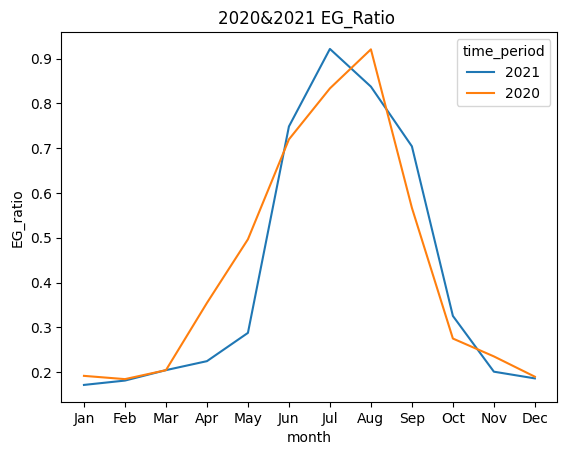

In [19]:
sns.lineplot(x="summary_time", y="EG_ratio", hue="time_period",data=annual_EGR).set(xlabel='month', title='2020&2021 EG_Ratio ')

##### **Hypotheses with an explanation**
- The maximum and minimum values for 2020 and 2021 are also almost identical, suggesting that some of the patterns in energy use are reflected some extent. 
- It is likely that this change is due to the fact that the proportion of energy use increases as temperatures rise due to colder winters, increased heating demand and the lack of heating demand in summer and the need for electric fans and air conditioning in some places.
- The hypothesis can be further tested if data on monthly temperature changes are available.

##### **2.  The energy mix may be influenced by region.** 

Further, complementing the spatial dimension to the temporal dimension, consider whether there may also be significant differences in values across regions.

In [20]:
# segment the data by region.
region_annual_data = data.loc[(data['segmentation_variable_1'] == 'Region') & 
                            (data['summary_stat'] == 'mean') &
                            ((data['summary_time'] == '2021') |
                            (data['summary_time'] == '2020'))]
# region_annual_data

In [21]:
# segment the region data by year.
region_annual_2020 = region_annual_data.loc[(region_annual_data['summary_time'] == '2020') ]
region_annual_2021 = region_annual_data.loc[(region_annual_data['summary_time'] == '2021') ]
# region_annual_2020

In [22]:
# caculate the EG_ratio
EG_ratio_region = np.array(region_annual_data.loc[region_annual_data['fuel'] == 'Net Electricity','value'] / np.array(region_annual_data.loc[region_annual_data['fuel'] == 'Gas', 'value']))
# EG_ratio_region

In [23]:
# add 'EG_ratio' to the dataframe and delete unnecessary columns.
region_annual_EGR = region_annual_data.loc[::2,['summary_time', 'time_period', 'segment_1_value', 'value']]
region_annual_EGR['EG_ratio'] = EG_ratio_region
del region_annual_EGR['value']
region_annual_EGR

,summary_time,time_period,segment_1_value,EG_ratio
76010,2021,2021,WEST MIDLANDS,0.243021
76620,2020,2020,WEST MIDLANDS,0.251993
77230,2021,2021,EAST MIDLANDS,0.238945
77840,2020,2020,EAST MIDLANDS,0.276361
78450,2021,2021,SOUTH WEST,0.291647
79060,2020,2020,SOUTH WEST,0.326895
79670,2021,2021,GREATER LONDON,0.245427
80280,2020,2020,GREATER LONDON,0.259613
80890,2021,2021,NORTH EAST,0.237193
81500,2020,2020,NORTH EAST,0.321030


[Text(0, 0.5, 'Region'), Text(0.5, 1.0, 'region data 2020')]

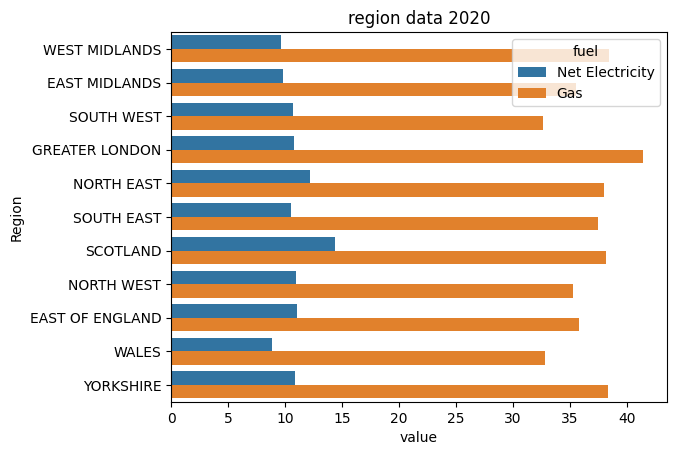

In [24]:
sns.barplot(y="segment_1_value", x="value" ,hue="fuel", data=region_annual_2020).set(ylabel='Region', title='region data 2020')

[Text(0, 0.5, 'Region'), Text(0.5, 1.0, 'region data 2021')]

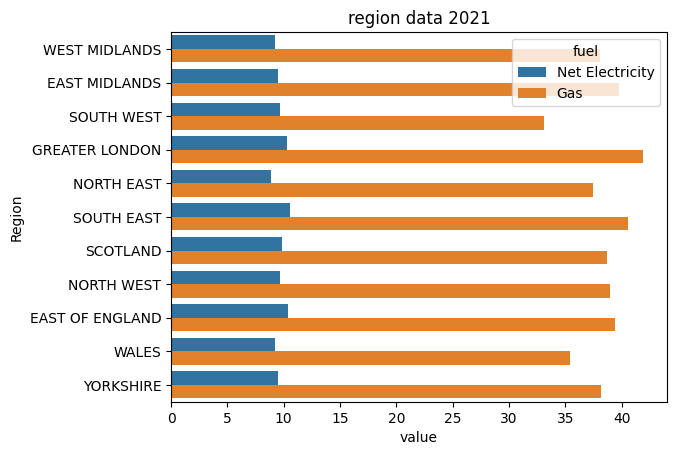

In [25]:
sns.barplot(y="segment_1_value", x="value",hue="fuel", data=region_annual_2021).set(ylabel='Region', title='region data 2021')

[Text(0, 0.5, 'Region'), Text(0.5, 1.0, 'region EG_ratio')]

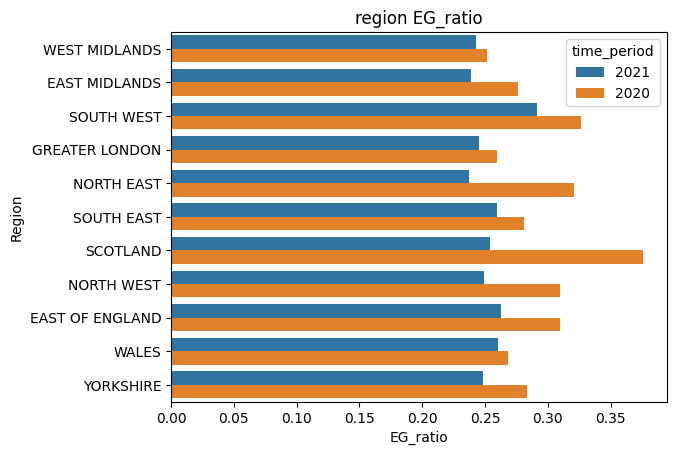

In [26]:
sns.barplot(y="segment_1_value", x="EG_ratio",hue="time_period", data=region_annual_EGR).set(ylabel='Region', title='region EG_ratio')

##### **Hypotheses with an explanation**
- As can be seen in the graph of **region EG_ratio**, all regions have a higher ratio in 2020 than the value for that region in 2021, with a very significant drop in Scotland in particular.
- Looking at the absolute values of electricity and gas consumption for each region in both 2020 and 2021, there is a significant increase in gas consumption in some regions in 2021. Electricity consumption decreases in relative terms. This is likely influenced by the lower winter temperatures in the same period in 2021 compared to 2020. It can be seen that the more northern region, like Scotland, is also the region where the proportional decrease is most pronounced, suggesting that the change in the mix of energy use in this region is more pronounced compared to other regions, most likely due to the influence of the colder climate.
- The hypothesis can be further tested if data on monthly temperature changes and more detail data of each region are available.

##### **3. The energy mix may be influenced by both time and building type.**

Also consider the month and region, looking if different regions show certain characteristics in specific month relative to other regions.

In [27]:
# segment the data by 'building_type_merge'.
building_monthly_data = data.loc[(data['segmentation_variable_1'] == 'building_type_merge') & 
            (data['summary_stat'] == 'mean') &
            (data['summary_time'] != '2021') &
            (data['summary_time'] != '2020') & 
            (data['mean_hdd'])      # a trick to avoid the every 30 minutes data.
            ]

# building_monthly_data

In [28]:
# calculate EG_ratio.
EG_ratio_building = np.array(building_monthly_data.loc[building_monthly_data['fuel'] == 'Net Electricity','value'] / np.array(building_monthly_data.loc[building_monthly_data['fuel'] == 'Gas', 'value']))
# EG_ratio_building

In [29]:
# add 'EG_ratio' to the dataframe and delete unnecessary columns.
building_monthly_EGR = building_monthly_data.loc[::2,['summary_time', 'time_period', 'segment_1_value', 'value']]
building_monthly_EGR['EG_ratio'] = EG_ratio_building
del building_monthly_EGR['value']

# building_monthly_EGR

In [30]:
# need to delete the 'xx-20' and 'xx-21' in 'summary_time'.
for i in range (144):   # 144 rows in building_monthly_EGR 
    building_monthly_EGR.iloc[i, 0] = str(building_monthly_EGR.iloc[i, 0][:-3])

In [31]:
# segment different years' data
building_monthly_EGR_2020 = building_monthly_EGR.loc[(building_monthly_EGR['time_period'] == '2020') ]
building_monthly_EGR_2021 = building_monthly_EGR.loc[(building_monthly_EGR['time_period'] == '2021') ]

[Text(0.5, 0, 'month'), Text(0.5, 1.0, 'building type EG_ratio 2020')]

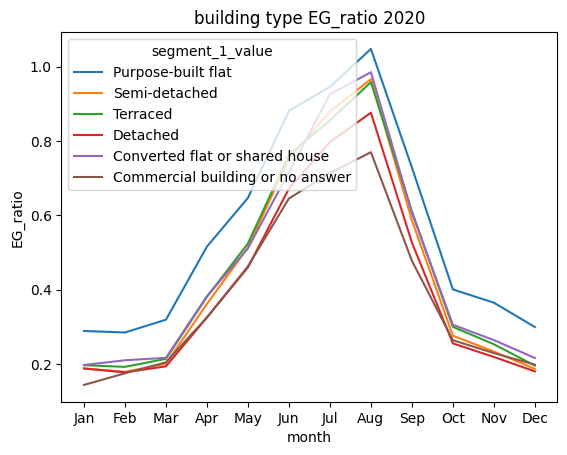

In [32]:
sns.lineplot(x="summary_time", y="EG_ratio",hue="segment_1_value", data=building_monthly_EGR_2020, palette='tab10').set(xlabel='month', title='building type EG_ratio 2020')

[Text(0.5, 0, 'month'), Text(0.5, 1.0, 'building type EG_ratio 2021')]

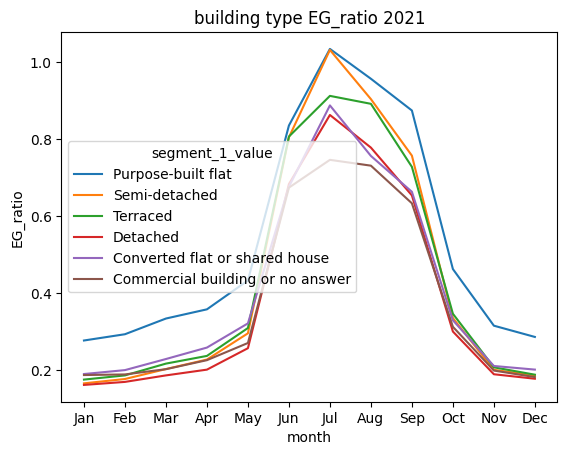

In [33]:
sns.lineplot(x="summary_time", y="EG_ratio",hue="segment_1_value", data=building_monthly_EGR_2021, palette='tab10').set(xlabel='month', title='building type EG_ratio 2021')

##### **Hypotheses with an explanation**
- The different building types continue to show consistent trends in EG_ratio and are broadly in line with previous trends shown in the **2020&2021 EG_ratio** graph.
- There are also clear differences between the different building types. 
    - the **EG_ration** of **Purpose-built flat** always gets the top line in every month in both 2020 and 2021.
    - the **EG_ration** of **Commercial building or no answer** is at lowest level in almost every month in both 2020 and 2021.
    - the **EG_ration** of **Semi-detached** and **Terraced** are relatively high.
- This may caused by the energy consumption habits and building construction of different residential populations.
- Further analysis is desirable in relation to the year of construction and other data on the dwellings being counted. However, we only got the statistical dataset with preset segmentations.

## **Reflection** ##

The dataset we got is very different from the one previously approached and has been statistically processed.  
Without access to the raw data, the areas that can be explored are relatively limited, and it takes some time to understand the segmentations and what each field represents.  
However, the type of data set is relatively simple, and there is a lot of information that can be mined.  